<a href="https://colab.research.google.com/github/Souha-BH/DataMining_GL4/blob/main/TP4/TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Partie 1 : Données de travail

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
fromage=pd.read_table(r"/content/fromage1.txt",sep="\t",header=0,index_col=0)
print(fromage.describe())
print(fromage.shape)
print(fromage)
#rofile = ProfileReport(fromage)
#print(profile)

         calories      sodium     calcium    lipides     retinol    folates  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   300.034483  210.086207  185.734483  24.158621   67.562069  13.010345   
std     91.914356  108.678923   72.528882   8.129642   24.163098  11.723339   
min     70.000000   22.000000   72.600000   3.400000   37.100000   1.200000   
25%    292.000000  140.000000  132.900000  23.400000   51.600000   4.900000   
50%    321.000000  223.000000  202.300000  26.300000   62.300000   6.400000   
75%    355.000000  276.000000  220.500000  29.100000   76.400000  21.100000   
max    406.000000  432.000000  334.600000  33.300000  150.500000  36.400000   

       proteines  cholesterol  magnesium  
count  29.000000    29.000000  29.000000  
mean   20.168966    74.586207  26.965517  
std     6.959788    28.245755  11.318388  
min     4.100000    10.000000  10.000000  
25%    17.800000    70.000000  20.000000  
50%    21.000000    80.000000 

**Comprendre et programmer les quelques lignes Précédentes : comment sont réparties
les données? Quels sont les attributs de ce jeu de données?**

Les données sont réparties de la façcon suivante:
- 29 instances
- 9 attributs : calories, sodium, calcium, lipides, retinol, folates, proteines,
cholesterol et magnesium


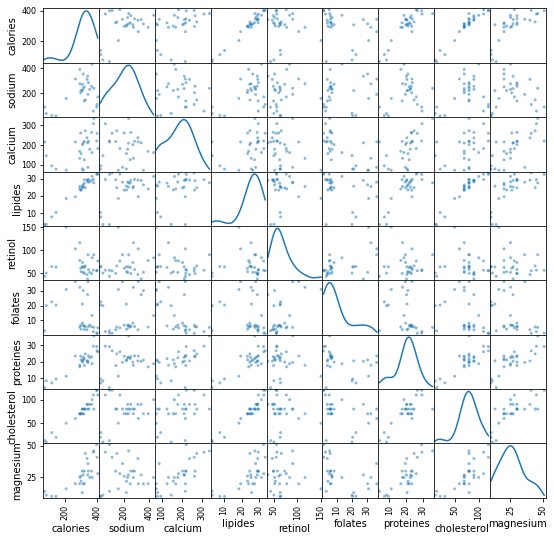

In [3]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(fromage, alpha=0.5,figsize=(9,9), diagonal='kde')
plt.show()

**Qu’est-ce que vous remarquez ?**

On utilise scatter_matrix pour voir la corrélation entre les différents attributs. On remarque que les attributs calories et cholesterol sont positivement corrélées. Aussi on a les attributs calories et lipides sont positivement corrélées. De meme pour les lipides et cholesterol. On peut donc éliminer deux de ces attributs. (On les retrouvera automatiquement dans le meme cluster)


### Partie 2 : Méthode des centres mobiles

In [4]:
import numpy as np
from sklearn import cluster
np.random.seed(0)
kmeans = cluster.KMeans(n_clusters = 4)
kmeans.fit(fromage)
idk = np.argsort(kmeans.labels_)
print(pd.DataFrame(fromage.index[idk],kmeans.labels_[idk]))
print(kmeans.transform(fromage))
print("cluster centers \n",kmeans.cluster_centers_)

             Fromages
0         CarredelEst
0                Tome
0         PontlEveque
0           Chabichou
0            Chaource
0         Coulomniers
0  Fr.chevrepatemolle
1            Beaufort
1         SaintPaulin
1             Cheddar
1               Comte
1                Edam
1            Emmental
1            Vacherin
1            Parmesan
2       Petitsuisse40
2  Yaourtlaitent.nat.
2      Fr.frais20nat.
2      Fr.frais40nat.
3           Maroilles
3             Morbier
3              Cantal
3           Camembert
3            Pyrenees
3           Reblochon
3          Rocquefort
3                Bleu
3             Babybel
3         Fr.fondu.45
[[123.59715669 285.36163076 384.27301005 145.46927992]
 [110.54651897 118.43379084 303.10311983  71.72681089]
 [235.25665316  56.72603293 349.91323389 218.1879268 ]
 [159.09984736 200.30401971 393.76898843  45.60922494]
 [141.19170858 210.31138298 332.43471728  84.66051854]
 [180.75982487 111.73150994 371.97076666  86.99931839]
 [ 72.0404

[0.50681355 0.37299771 0.3282387  0.35737616 0.32267618 0.28114392
 0.29450378 0.23904343 0.25006247]


<function matplotlib.pyplot.show>

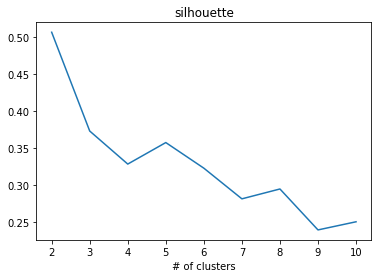

In [5]:
from sklearn import metrics
#utilisation de la métrique "silhouette"
res = np.arange(9, dtype ="double")
for k in np.arange(9):
  km = cluster.KMeans(n_clusters = k+2)
  km.fit(fromage)
  res[k] = metrics.silhouette_score(fromage,km.labels_)
print (res)
#graphique
import matplotlib.pyplot as plt
plt.title("silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),(res))
plt.show

**2. Quelle est la meilleure valeur de k (nombre de clusters) selon la métrique silhouette ?**

Le score le plus élévé est de 0.506 pour un nombre de clusters de 2. Cependant, il faut éviter d'utiliser un clustering à 2. Donc on choisit le nombre 3 pour un score de 0.37 ou 5 avec un score de 0.35. (réellement le meilleur choix est de 4)

### Partie 3 : Classification ascendante hiérarchique

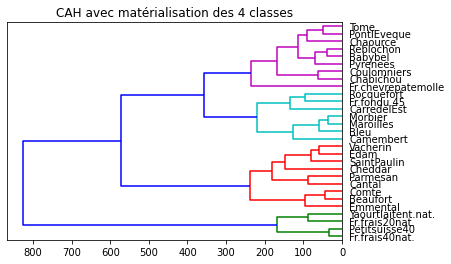

[3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]
             Fromages
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
1      Fr.frais20nat.
2         SaintPaulin
2            Beaufort
2              Cantal
2            Parmesan
2             Cheddar
2               Comte
2                Edam
2            Emmental
2            Vacherin
3          Rocquefort
3             Morbier
3           Maroilles
3         CarredelEst
3           Camembert
3                Bleu
3         Fr.fondu.45
4         Coulomniers
4            Chaource
4           Chabichou
4         PontlEveque
4            Pyrenees
4           Reblochon
4             Babybel
4                Tome
4  Fr.chevrepatemolle


In [6]:
import pandas
import numpy as np
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(fromage,method='ward', metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=255)
plt.show()
groupes_cah = fcluster(Z, t = 255,criterion='distance')
print(groupes_cah)
#index triés des groupes
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
print(pandas.DataFrame(fromage.index[idg],groupes_cah[idg]))

**2. Interpréter les résultats**

Selon l'algorithme CAH, le meilleur nombre de clusters est 4.

**3. Donnez la correspondance entre les groupes de la CAH et les clusters de Kmeans en utilisant la méthode pandas.crosstab**


In [7]:
pd.crosstab(kmeans.labels_,groupes_cah)

col_0,1,2,3,4
row_0,,,,
0,0,0,1,6
1,0,8,0,0
2,4,0,0,0
3,0,1,6,3


### Partie 3 : Interprétation des classes
L’analyse en composante principale consiste à transformer des variables liées entre
elles en nouvelles variables décorrélées les unes des autres.
Ces nouvelles variables sont nommées « composantes principales », ou axes
principaux. Elle permet au praticien de réduire le nombre de variables et de rendre
l'information moins redondante.

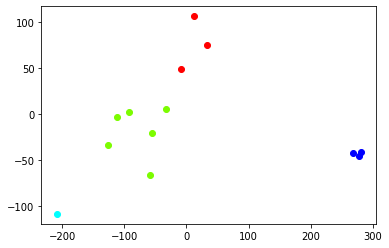

In [8]:
from sklearn.decomposition import PCA
acp = PCA(n_components =2).fit_transform(fromage)
for couleur,k in zip(['red','blue','lawngreen', 'aqua'],[0,1,2,3]):
  plt.scatter(acp[km.labels_==k,0],acp[km.labels_==k,1],c=couleur)
plt.show()

Le groupe bleu se trouve distant des 3 autres groupes ce qui rend la nature des
groupes difficile à comprendre.

### Partie 4: CAH avec sklearn.cluster.AgglomerativeClustering

In [14]:
from sklearn.cluster import AgglomerativeClustering
np.random.seed(0)
agg_c = AgglomerativeClustering(n_clusters=4)
agg_c.fit(fromage)
idk_ = np.argsort(agg_c.labels_)
print(pd.DataFrame(fromage.index[idk_],agg_c.labels_[idk_]))


             Fromages
0         SaintPaulin
0            Beaufort
0            Parmesan
0              Cantal
0             Cheddar
0               Comte
0            Vacherin
0                Edam
0            Emmental
1         CarredelEst
1          Rocquefort
1             Morbier
1           Maroilles
1         Fr.fondu.45
1           Camembert
1                Bleu
2         Coulomniers
2            Chaource
2           Chabichou
2         PontlEveque
2            Pyrenees
2           Reblochon
2             Babybel
2                Tome
2  Fr.chevrepatemolle
3      Fr.frais20nat.
3      Fr.frais40nat.
3       Petitsuisse40
3  Yaourtlaitent.nat.


In [15]:
pd.crosstab(kmeans.labels_,agg_c.labels_)

col_0,0,1,2,3
row_0,,,,
0,0,1,6,0
1,8,0,0,0
2,0,0,0,4
3,1,6,3,0


In [16]:
pd.crosstab(groupes_cah,agg_c.labels_)

col_0,0,1,2,3
row_0,,,,
1,0,0,0,4
2,9,0,0,0
3,0,7,0,0
4,0,0,9,0


Les deux tableaux de correspondance montrent une forte coincidence entre les résultat
du CAH avec l’agglomerative clustering or qu’il coincide seulement en sa classe 2 avec
la classe 3 du kmeans.
#### Détermination du meilleur k à l’aide de l’indice silhouette:

[0.52134151 1.         2.         3.         4.         5.
 6.         7.         8.        ]
[0.52134151 0.36462293 2.         3.         4.         5.
 6.         7.         8.        ]
[0.52134151 0.36462293 0.31556786 3.         4.         5.
 6.         7.         8.        ]
[0.52134151 0.36462293 0.31556786 0.29047977 4.         5.
 6.         7.         8.        ]
[0.52134151 0.36462293 0.31556786 0.29047977 0.26590169 5.
 6.         7.         8.        ]
[0.52134151 0.36462293 0.31556786 0.29047977 0.26590169 0.25366641
 6.         7.         8.        ]
[0.52134151 0.36462293 0.31556786 0.29047977 0.26590169 0.25366641
 0.26811403 7.         8.        ]
[0.52134151 0.36462293 0.31556786 0.29047977 0.26590169 0.25366641
 0.26811403 0.26090835 8.        ]
[0.52134151 0.36462293 0.31556786 0.29047977 0.26590169 0.25366641
 0.26811403 0.26090835 0.25588299]


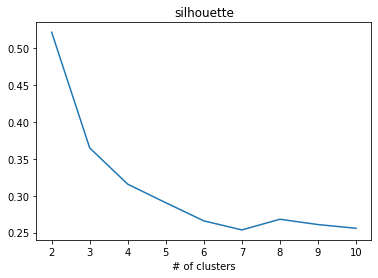

In [21]:
from sklearn import metrics
res=np.arange(9, dtype="double")
for k in np.arange(9):
  agg=AgglomerativeClustering(n_clusters= k + 2)
  agg.fit(fromage)
  res[k]=metrics.silhouette_score(fromage,agg.labels_)
  print(res)
import matplotlib.pyplot as plt
plt.title("silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),(res))
plt.show()

On peut déduire que k=2 est meilleur pour le clustering.

### Partie 5 : Divisive Clustering à l’aide de k-means